In [1]:
import pickle
import datetime
from numpy import array
import warnings
from tqdm import tqdm_notebook as tqdm
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import plotly as py
from matplotlib import rcParams
import seaborn as sns
import matplotlib.pylab as plt
import math
import pickle
import os
import pandas as pd
import folium
import math
import numpy as np
import matplotlib
from itertools import cycle
sns.set()
matplotlib.use('nbagg')
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline
import covsirphy as cs

# Download datasets
data_loader = cs.DataLoader("input")
jhu_data = data_loader.jhu()
population_data = data_loader.population()

Retrieving datasets from COVID-19 Data Hub: https://covid19datahub.io/

Please set verbose=2 to see the detailed citation list.


Retrieving COVID-19 dataset in Japan from https://github.com/lisphilar/covid19-sir/data/japan


In [3]:
# all_phases = snl.summary().index.tolist()
# snl.enable(all_phases)
# snl.disable(phases=["17th", "5th", "7th", "6th", "12th", "3rd", "13th", "14th", ])
# snl.history("Infected")

# Create trainingset for the SIRF model

In [4]:
train = jhu_data.cleaned()
countries = train["Country"].unique()
total_data = []
days_moving_average = 3

for country in countries:
    try:
        s = cs.Scenario(jhu_data, population_data, country=country)
        s.complement()
        diff = s.records_diff(variables=["Confirmed"], window=days_moving_average, show_figure=False)
        d = s.records(show_figure=False)
        
        # Add country name and number of new confirmed cases
        d["Country"] = country
        d["New Confirmed"] = diff.reset_index()["Confirmed"]
        d = d[:-3]
        total_data.append(d)
    except:
        print(country + " not found")
        
train_df = pd.concat(total_data)
train_df.head()

American Samoa not found
Others not found
South Korea not found
Tajikistan not found


,Date,Confirmed,Infected,Fatal,Recovered,Country,New Confirmed
0,2020-03-20,29,28,0,1,Afghanistan,4.0
1,2020-03-21,30,29,0,1,Afghanistan,4.0
2,2020-03-22,34,32,1,1,Afghanistan,14.0
3,2020-03-23,41,39,1,1,Afghanistan,13.0
4,2020-03-24,43,41,1,1,Afghanistan,16.0


### Make selection of data up until pivot date

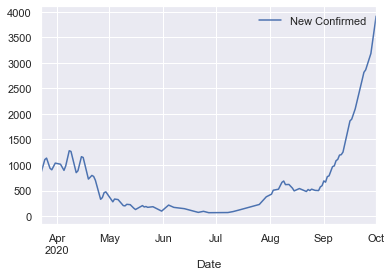

In [5]:
# First, convert data to the correct format
country = "Netherlands"
pivot_date = "'2020-10-01'"
train_section = train_df[train_df["Country"] == country].query("Date<=" + pivot_date)
train_section.plot(x="Date", y="New Confirmed")
train_section["Province"] = "-"
jhu_data = cs.JHUData.from_dataframe(train_section)


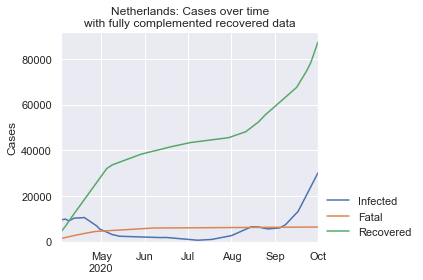

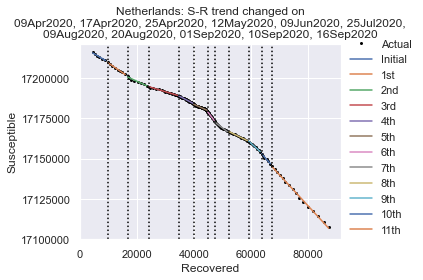

In [6]:
# population_data = cs.PopulationData()
# population_data.update(17280000, country=country)
snl = cs.Scenario(jhu_data, population_data, country=country)
data = snl.records()
snl.add(days=60)
trend = snl.trend(show_figure=True)

In [7]:
# Parameter estimation of SIR model
snl.estimate(cs.SIRF, show_figure=False, auto_complement=False)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...
	 4th phase (20Aug2020 - 31Aug2020): finished  782 trials in 0 min 40 sec
	 8th phase (25Apr2020 - 11May2020): finished  270 trials in 0 min 20 sec
	11th phase (12May2020 - 08Jun2020): finished  384 trials in 0 min 30 sec
	 3rd phase (09Apr2020 - 16Apr2020): finished  507 trials in 0 min 40 sec
	 0th phase (09Aug2020 - 19Aug2020): finished 1794 trials in 3 min  1 sec
	 9th phase (03Apr2020 - 08Apr2020): finished 1805 trials in 3 min  1 sec
	 7th phase (09Jun2020 - 24Jul2020): finished 1776 trials in 3 min  1 sec
	 1st phase (01Sep2020 - 09Sep2020): finished 1812 trials in 3 min  1 sec
	10th phase (10Sep2020 - 15Sep2020): finished  280 trials in 0 min 20 sec
	 5th phase (16Sep2020 - 01Oct2020): finished  492 trials in 0 min 30 sec
	 6th phase (17Apr2020 - 24Apr2020): finished 2266 trials in 3 min  1 sec
	 2nd phase (25Jul2020 - 08Aug2020): finished 2394 trials in 3 min  1 sec
Completed optimization. Total: 7 min 14

In [8]:
# all_phases = snl.summary().index.tolist()
# snl.enable(all_phases)
# snl.disable(phases=["17th", "5th", "7th", "6th", "12th", "3rd", "13th", "14th", ])
# snl.history("Infected")
snl.add(days=100)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


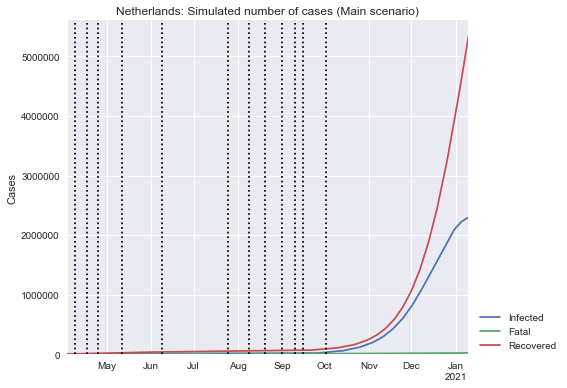

In [9]:
print(plt.style.available)
plt.style.use('seaborn')

data = snl.simulate()

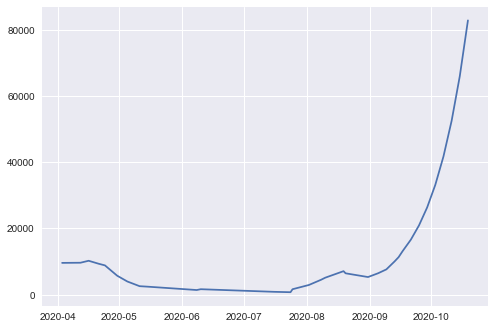

In [14]:
# data.to_pickle("data/Netherlands_2020-10-01_SIR.p")
plt.plot(data[:200]["Date"], data[:200]["Infected"]);
plt.show()

In [16]:
data.to_pickle("data/Netherlands_2020-10-01_SIR.p")

In [21]:
summary = snl.summary()
summary

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/gamma [day],1/alpha2 [day],alpha1 [-],1/beta [day],RMSLE,Trials,Runtime
0th,Past,03Apr2020,08Apr2020,17231624,SIR-F,0.97,0.152933,0.000069,0.033507,0.029067,480,11,4813,0.153,9,0.024527,1805.0,3 min 1 sec
1st,Past,09Apr2020,16Apr2020,17231624,SIR-F,1.18,0.111229,0.000071,0.037300,0.028034,480,11,4675,0.111,8,0.026520,507.0,0 min 40 sec
2nd,Past,17Apr2020,24Apr2020,17231624,SIR-F,0.82,0.117703,0.000391,0.030980,0.032758,480,10,853,0.118,10,0.033221,2266.0,3 min 1 sec
3rd,Past,25Apr2020,11May2020,17231624,SIR-F,0.45,0.177165,0.000060,0.023977,0.044027,480,7,5587,0.177,13,0.036289,270.0,0 min 20 sec
4th,Past,12May2020,08Jun2020,17231624,SIR-F,0.78,0.110698,0.000071,0.030514,0.034551,480,9,4723,0.111,10,0.059477,384.0,0 min 30 sec
5th,Past,09Jun2020,24Jul2020,17231624,SIR-F,0.81,0.037791,0.000002,0.026439,0.031439,480,10,136958,0.038,12,0.171659,1776.0,3 min 1 sec
6th,Past,25Jul2020,08Aug2020,17231624,SIR-F,2.20,0.000490,0.000106,0.044318,0.020015,480,16,3141,0.000,7,0.018763,2394.0,3 min 1 sec
7th,Past,09Aug2020,19Aug2020,17231624,SIR-F,1.57,0.000011,0.000099,0.033648,0.021299,480,15,3371,0.000,9,0.033373,1794.0,3 min 1 sec
8th,Past,20Aug2020,31Aug2020,17231624,SIR-F,0.83,0.000696,0.000336,0.028929,0.034289,480,9,992,0.001,11,0.016955,782.0,0 min 40 sec
9th,Past,01Sep2020,09Sep2020,17231624,SIR-F,1.54,0.001266,0.000082,0.039622,0.025665,480,12,4065,0.001,8,0.014532,1812.0,3 min 1 sec


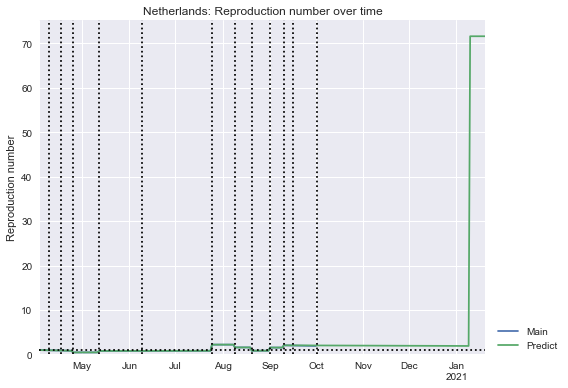

Date
2020-04-03    0.97
2020-04-04    0.97
2020-04-05    0.97
2020-04-06    0.97
2020-04-07    0.97
              ... 
2021-01-16     NaN
2021-01-17     NaN
2021-01-18     NaN
2021-01-19     NaN
2021-01-20     NaN
Name: Main, Length: 293, dtype: float64

In [29]:
# snl.disable(phases=["12th"])
# snl.add(name="Predict", end_date="20Jan2021", sigma=0.0005)
# snl.simulate(name="Predict")
# snl.disable(phase="12th")

Rt = snl.history(target="Rt")
Rt["Main"]